# The Vicsek Model 


#TODO (Marc and Jake)
calculate_order_stat method 
plot_order_stat method
calculate_new_theta metho


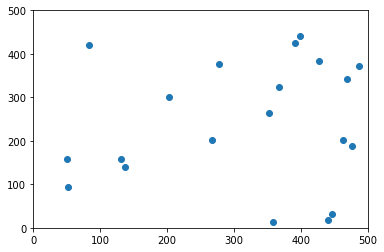

In [112]:
import numpy as np 
import random 
from math import *
import matplotlib.pyplot as plt
from IPython.display import HTML

##USEFUL FUNCTIONS
normal = lambda p: np.array([cos(p),sin(p)])
normalise = lambda p: p/(sqrt(p[0]**2+p[1]**2))

class Bird():
    def __init__(self,speed,frame_size):
        self.speed = speed
        self.pos = np.array([random.uniform(0,frame_size),random.uniform(0,frame_size)])
        self.theta = random.uniform(0,2*pi)
        self.frame_size = frame_size

    def calculate_new_posdir(self,flock,dt,sigma,R):
        new_theta = self.calculate_new_theta(flock.postions,R)
        n = normal(new_theta)
        new_pos = np.mod((self.pos + self.speed*n*dt),self.frame_size)
        return np.array([new_pos,new_theta])

    def calculate_new_theta(self,flock_posdir,sigma,R):
        

class Flock():
    def __init__(self,N,speed,frame_size):
        self.birds =[Bird(speed,frame_size) for b in range(N)]
        self.frame_size =frame_size

    def get_positions(self):
        return np.array([bird.pos for bird in self.birds])

    def get_thetas(self):
        return np.array([bird.theta for bird in self.birds])
    
    def update_posdirs(self,dt,sigma,R):
        new_posdir = [b.calculate_new_posdir(self,dt,sigma,R) for b in self.birds]
        for i,b in enumerate(self.birds):
            b.pos = new_posdir[i][0]
            b.theta =new_posdir[i][1]

    def calculate_order_stat(self):
        pass

    def display_state(self):
        """Displays current postions of birds on scatter plot """
        fig,ax = plt.subplots()
        positions =self.get_positions()
        ax.set(xlim=(0,self.frame_size),ylim = (0,self.frame_size))
        plt.scatter(positions[:,0],positions[:,1])
        plt.show()

    def animate_movement(self,dt,interval,frames):
        """Creates a matplotlib animation of the birds moving """
        ##setting up plot
        fig,ax = plt.subplots()
        ax.set(xlim=(0,frame_size),ylim=(0,self.frame_size))
        init_pos = self.get_positions()
        scat =ax.scatter(init_pos[0],init_pos[1])

        #used in funcanimation to update states
        def animate(i):
            self.update_pos(dt)
            pos = self.get_positions()
            scat.set_offsets(pos)
        anim  = animation.FuncAnimation(
            fig,animate,interval = interval,frames =frames
        )
        return anim
    
    def plot_order_stat(self):
        pass


        

f = Flock(20,10,500)

f.display_state()

In [ ]:
Testing

## Straight Line Birds
To test out animation and position updating slowly we will use a simple straight line bird that moves at a constant speed in a random direction.

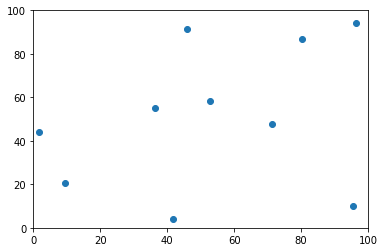

In [113]:
class SL_Bird(Bird):
    def calculate_new_pos(self,dt):
        n = normal(self.theta)
        new_pos = np.mod((self.pos + self.speed*n*dt),self.frame_size)
        return np.array(new_pos)

class SL_Flock(Flock):
    def __init__(self,N,speed,frame_size):
        Flock.__init__(self,N,speed,frame_size)
        self.birds = [SL_Bird(speed,frame_size) for b in range(N)]
    def update_pos(self,dt):
        new_pos = [b.calculate_new_pos(dt) for b in self.birds]
        for i,b in enumerate(self.birds):
            b.pos = new_pos[i]


%matplotlib inline
fsl = SL_Flock(10,100,100)
fsl.display_state()
#test change


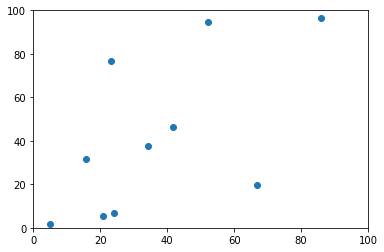

In [114]:
fsl = SL_Flock(10,10,100)
anim = fsl.animate_movement(0.1,10,500)
HTML(anim.to_jshtml())

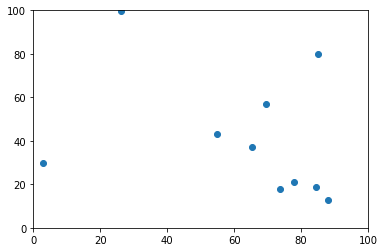

In [91]:
##animating movement
#flock set up - this flock has 10 birds with a speed of 10
frame_size=100
dt =0.1
fsl = SL_Flock(10,10,frame_size)

fig,ax = plt.subplots()
ax.set(xlim=(0,frame_size),ylim=(0,frame_size))
init_pos = fsl.get_positions()
scat =ax.scatter(init_pos[0],init_pos[1])

def animate(i):
    fsl.update_pos(dt)
    pos = fsl.get_positions()
    scat.set_offsets(pos)
anim  = animation.FuncAnimation(
    fig,animate,interval = 100,frames =100
)
HTML(anim.to_jshtml())